<a href="https://colab.research.google.com/github/jazu1412/PYCARET_LOWCODE_ML/blob/main/clustering_notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ONU Sustainability of Countries Development
ONU Indexes UNSDG "United Nations Sustainable Development Group" (or simply SDG)

https://www.kaggle.com/datasets/vittoriogiatti/unsdg-united-nations-sustainable-development-group

# Clustering Analysis with PyCaret

This notebook demonstrates how to perform  UN based Country index data clustering analysis using the PyCaret library. We'll cover the following steps:
1. Installation and setup
2. Data loading and preprocessing
3. Creating and evaluating a K-means clustering model
4. Predicting on new data
5. Saving the model
6. Additional PyCaret capabilities: Elbow Plot and Silhouette Plot

## 1. Installation and Setup

First, let's install PyCaret and its MLOps dependencies.

In [ ]:
!pip install pycaret
!pip install pycaret[mlops]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 520.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

Now, let's import the necessary libraries.

In [ ]:
from pycaret.clustering import ClusteringExperiment
import pandas as pd
from google.colab import files
import io

## 2. Data Loading and Preprocessing

We'll upload a CSV file and load it into a pandas DataFrame.

In [ ]:
uploaded_file = files.upload()
raw_dataset = pd.read_csv(io.BytesIO(uploaded_file["unsdg_2002_2021.csv"]))
raw_dataset.head()

Saving unsdg_2002_2021.csv to unsdg_2002_2021.csv


,dt_year,dt_date,country,region,level_of_development,greenhousegas_emissione_mtco2equivalent,total_government_revenue_proportion_of_gdp_perc,fdi_inflows_millionusd,annual_growth_rate_perc,proportion_of_population_with_primary_reliance_on_clean_fuels_a,mortality_rate_perc,renewable_energy_share_on_the_total_energy_consumption,co2emissions_from_fuel_combustion_in_millions_of_tonnes,fossilfuel_subsidies_consumption_and_production_billionusd,randd_expenditure_proportionofgdp_perc,national_action_plans_as_priority_national_policies,number_of_companies_publishing_sustainability_reports,education_for_sustainable_development,enhance_policy_coherence_for_sustainable_development,land_degraded_over_total_land_area
0,2002,2002-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,NaN,0.68,0.420344,8.0,NaN,37.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,2003-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,0.120955,50.00,0.105249,9.0,NaN,36.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,2004-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,0.176214,57.80,-0.014901,11.0,NaN,44.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,2005-01-01,Afghanistan,Central and Southern Asia,Least Developed,19.32802,0.180929,186.90,0.036212,12.0,0.409,33.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,2006-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,0.302234,271.00,0.053648,14.0,NaN,31.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next, we'll set up the clustering experiment using PyCaret.

In [ ]:
from pycaret.clustering import *
cluster_experiment = ClusteringExperiment()

# Update setup to include any missing categorical features
cluster_experiment.setup(raw_dataset, session_id=456, use_gpu=True)

,Description,Value
0,Session id,456
1,Original data shape,"(5176, 20)"
2,Transformed data shape,"(5176, 308)"
3,Numeric features,16
4,Categorical features,4
5,Rows with missing values,100.0%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


## 3. Creating and Evaluating a K-means Clustering Model

Now, let's create a K-means clustering model with 3 clusters.

In [ ]:
kmeans_model = cluster_experiment.create_model('kmeans')
cluster_experiment.models()

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8686,11086.0226,0.4975,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


Let's assign the cluster labels to our dataset and view the results.

In [ ]:
clustered_data = cluster_experiment.assign_model(kmeans_model)
clustered_data.head()

,dt_year,dt_date,country,region,level_of_development,greenhousegas_emissione_mtco2equivalent,total_government_revenue_proportion_of_gdp_perc,fdi_inflows_millionusd,annual_growth_rate_perc,proportion_of_population_with_primary_reliance_on_clean_fuels_a,...,renewable_energy_share_on_the_total_energy_consumption,co2emissions_from_fuel_combustion_in_millions_of_tonnes,fossilfuel_subsidies_consumption_and_production_billionusd,randd_expenditure_proportionofgdp_perc,national_action_plans_as_priority_national_policies,number_of_companies_publishing_sustainability_reports,education_for_sustainable_development,enhance_policy_coherence_for_sustainable_development,land_degraded_over_total_land_area,Cluster
0,2002,2002-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,NaN,0.680000,0.420344,8.0,...,37.830002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cluster 0
1,2003,2003-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,0.120955,50.000000,0.105249,9.0,...,36.660000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cluster 0
2,2004,2004-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,0.176215,57.799999,-0.014901,11.0,...,44.240002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cluster 0
3,2005,2005-01-01,Afghanistan,Central and Southern Asia,Least Developed,19.32802,0.180929,186.899994,0.036212,12.0,...,33.880001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cluster 0
4,2006,2006-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,0.302234,271.000000,0.053648,14.0,...,31.889999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cluster 0


Now, we'll evaluate the model using PyCaret's built-in visualization tools.

In [ ]:
cluster_experiment.evaluate_model(kmeans_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## 4. Predicting on New Data

Let's load a new dataset and use our model to predict cluster assignments.

In [ ]:
fresh_data = pd.read_csv('unsdg_2002_2021.csv')
predictions = cluster_experiment.predict_model(kmeans_model, data=fresh_data)
predictions.head()

,dt_year,dt_date_2002-01-01,dt_date_2003-01-01,dt_date_2004-01-01,dt_date_2005-01-01,dt_date_2006-01-01,dt_date_2007-01-01,dt_date_2008-01-01,dt_date_2009-01-01,dt_date_2010-01-01,...,renewable_energy_share_on_the_total_energy_consumption,co2emissions_from_fuel_combustion_in_millions_of_tonnes,fossilfuel_subsidies_consumption_and_production_billionusd,randd_expenditure_proportionofgdp_perc,national_action_plans_as_priority_national_policies,number_of_companies_publishing_sustainability_reports,education_for_sustainable_development,enhance_policy_coherence_for_sustainable_development,land_degraded_over_total_land_area,Cluster
0,2002.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.83,198.372823,2.108094,0.009325,1.0,104.36631,0.224266,75.057692,19.758065,Cluster 0
1,2003.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.66,198.372823,2.108094,0.009325,1.0,104.36631,0.224266,75.057692,19.758065,Cluster 0
2,2004.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.24,198.372823,2.108094,0.009325,1.0,104.36631,0.224266,75.057692,19.758065,Cluster 0
3,2005.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,33.88,198.372823,2.108094,0.009325,1.0,104.36631,0.224266,75.057692,19.758065,Cluster 0
4,2006.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,31.89,198.372823,2.108094,0.009325,1.0,104.36631,0.224266,75.057692,19.758065,Cluster 0


## 5. Saving the Model

We can save our trained model for future use.

In [ ]:
cluster_experiment.save_model(kmeans_model, 'kmeans_cluster_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['dt_year',
                                              'greenhousegas_emissione_mtco2equivalent',
                                              'total_government_revenue_proportion_of_gdp_perc',
                                              'fdi_inflows_millionusd',
                                              'annual_growth_rate_perc',
                                              'proportion_of_population_with_primary_reliance_on_clean_fuels_a',
                                              'mortality_rate_perc',
                                              'renewable_ener...
                                              'level_of_development'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['dt_date', 'country', 'region',
        

## 6. Additional PyCaret Capabilities

Let's explore two additional capabilities of PyCaret: the Elbow Plot and the Silhouette Plot.

### 6.1 Elbow Plot

The Elbow Plot helps us determine the optimal number of clusters.

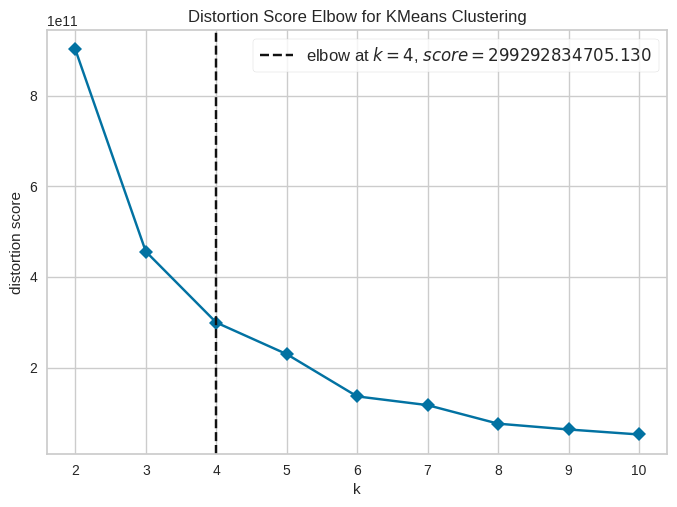

In [ ]:
cluster_experiment.plot_model(kmeans_model, plot='elbow')

### 6.2 Silhouette Plot

The Silhouette Plot helps us evaluate the quality of our clusters.

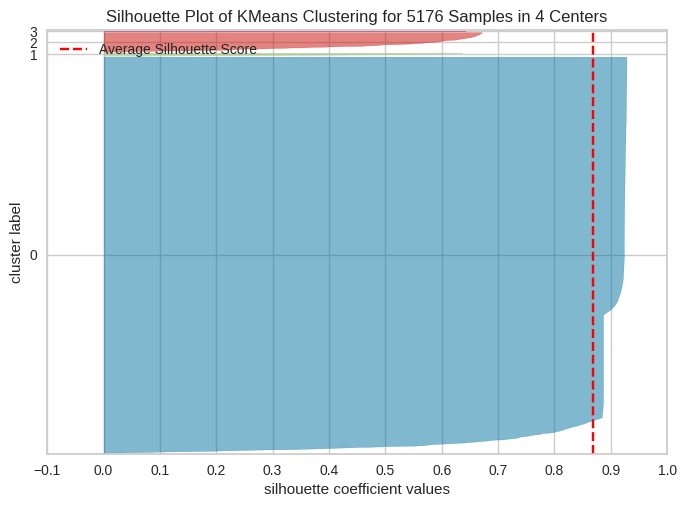

In [ ]:
cluster_experiment.plot_model(kmeans_model, plot='silhouette')

These additional plots provide valuable insights into the clustering process and help validate our choice of the number of clusters.

In [ ]:
cluster_experiment.plot_model(kmeans_model, plot='cluster')

In [ ]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5176 entries, 0 to 5175
Data columns (total 20 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   dt_year                                                          5176 non-null   int64  
 1   dt_date                                                          5176 non-null   object 
 2   country                                                          5176 non-null   object 
 3   region                                                           5176 non-null   object 
 4   level_of_development                                             5176 non-null   object 
 5   greenhousegas_emissione_mtco2equivalent                          1192 non-null   float64
 6   total_government_revenue_proportion_of_gdp_perc                  2693 non-null   float64
 7   fdi_inflows_millionusd                    

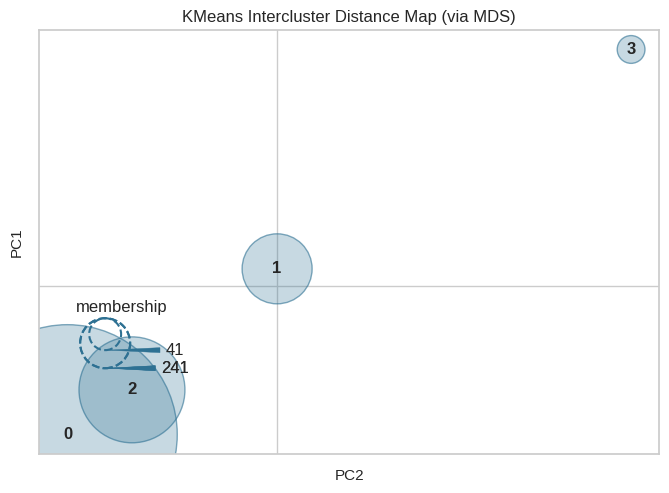

In [ ]:
cluster_experiment.plot_model(kmeans_model, plot='distance')

In [ ]:
cluster_experiment.plot_model(kmeans_model, plot='distribution')

In [ ]:
# First, let's see what cluster numbers we actually have
unique_clusters = clustered_data['Cluster'].unique()
print("Unique cluster numbers:", unique_clusters)

Unique cluster numbers: ['Cluster 0' 'Cluster 2' 'Cluster 1' 'Cluster 3']


In [ ]:
# Now, display countries in each cluster
for cluster in unique_clusters:
    print(f"\nCountries in Cluster {cluster}:")
    cluster_countries = clustered_data[clustered_data['Cluster'] == cluster]['country'].unique()
    for country in cluster_countries:
        print(country)



Countries in Cluster Cluster 0:
Afghanistan
Åland Islands
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antarctica
Antigua and Barbuda
Areas not elsewhere specified
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia (Plurinational State of)
Bonaire, Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Bouvet Island
Brazil
British Indian Ocean Territory
British Virgin Islands
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Chad
Chile
China
China, Hong Kong Special Administrative Region
China, Macao Special Administrative Region
Christmas Island
Cocos (Keeling) Islands
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Côte d'Ivoire
Croatia
Cuba
Curaçao
Cyprus
Czechia
Democratic People's Republic of Korea
Democratic Republic of the Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatori

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install matplotlib scikit-learn


Countries in Cluster 0:
Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antarctica
Antigua and Barbuda
Areas not elsewhere specified
Argentina
Armenia
Aruba
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belize
Benin
Bermuda
Bhutan
Bolivia (Plurinational State of)
Bonaire, Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Bouvet Island
British Indian Ocean Territory
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Cayman Islands
Central African Republic
Chad
Chile
China, Macao Special Administrative Region
Christmas Island
Cocos (Keeling) Islands
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Croatia
Cuba
Curaçao
Cyprus
Czechia
Côte d'Ivoire
Democratic People's Republic of Korea
Democratic Republic of the Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Falkland Islands (Malvinas)
Faroe Islands
Fiji
Finland
France
French Guiana
French Pol

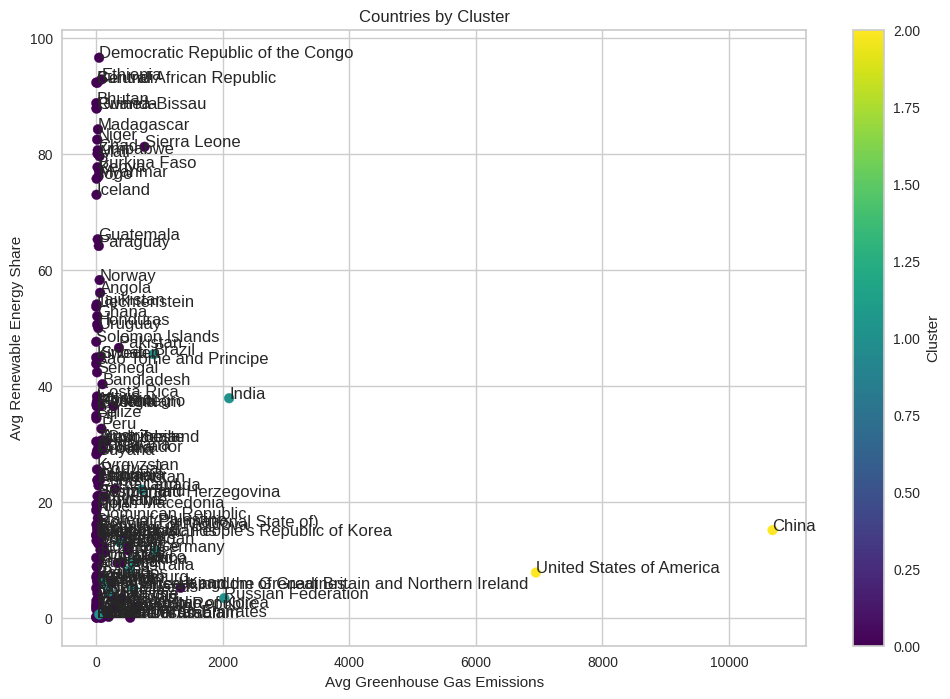

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# First, let's assign the most common cluster to each country
country_clusters = clustered_data.groupby('country')['Cluster'].agg(lambda x: x.value_counts().index[0]).reset_index()
country_clusters.columns = ['country', 'Cluster']

# Now, let's get the average metrics for each country
country_metrics = clustered_data.groupby('country').agg({
    'greenhousegas_emissione_mtco2equivalent': 'mean',
    'renewable_energy_share_on_the_total_energy_consumption': 'mean',
    'annual_growth_rate_perc': 'mean'
}).reset_index()

# Merge the cluster assignments with the metrics
country_summary = country_clusters.merge(country_metrics, on='country')

# Create a mapping of cluster labels to numerical values
cluster_mapping = {cluster: i for i, cluster in enumerate(country_summary['Cluster'].unique())}
country_summary['Cluster_num'] = country_summary['Cluster'].map(cluster_mapping)

# Display countries in each cluster
for cluster in country_summary['Cluster'].unique():
    print(f"\nCountries in {cluster}:")
    cluster_countries = country_summary[country_summary['Cluster'] == cluster]['country']
    for country in cluster_countries:
        print(country)

# Create a summary dataframe
summary_df = country_summary.sort_values('Cluster')

# Rename columns for clarity
summary_df.columns = ['Country', 'Cluster', 'Avg Greenhouse Gas Emissions', 'Avg Renewable Energy Share', 'Avg Annual Growth Rate', 'Cluster_num']

# Display the summary dataframe
print("\nSummary of all Clusters:")
print(summary_df.to_string(index=False))

# Create visualizations for the final clusters

# 1. Scatter plot of clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(summary_df['Avg Greenhouse Gas Emissions'],
                      summary_df['Avg Renewable Energy Share'],
                      c=summary_df['Cluster_num'],
                      cmap='viridis')
plt.xlabel('Avg Greenhouse Gas Emissions')
plt.ylabel('Avg Renewable Energy Share')
plt.title('Countries by Cluster')
plt.colorbar(scatter, label='Cluster')
for i, txt in enumerate(summary_df['Country']):
    plt.annotate(txt, (summary_df['Avg Greenhouse Gas Emissions'].iloc[i], summary_df['Avg Renewable Energy Share'].iloc[i]))
plt.show()
